In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score


from general_code import *

In [3]:
#Read using function
y1, y2, y3, y4, X_, realization = treatment.data_initialization(realiz=True)
X_.head()

,enzyme_complex_concentration,enzyme_concentration,mu_mass,product_concentration,substrate_concentration,volume_fraction,sigma_mass_0.0,sigma_mass_0.825
0,-9.761988,-11.959213,12.1,-9.230543,-9.923690,0.2,1,0
1,-11.959213,-9.761988,12.1,-8.825078,-8.314252,0.2,1,0
2,-10.860600,-10.013302,31.9,-11.022305,-10.616837,0.2,0,1
3,-11.266065,-9.879771,12.1,-8.537396,-11.309985,0.4,1,0
4,-11.959213,-9.761988,12.1,-9.923690,-8.825078,0.2,1,0


In [4]:
X_.shape

(151956, 8)

In [4]:
Y = np.column_stack((y1, y1, y3, y4))

# Plots

Seems useless, nothing to see

# Data engineering

### Interactions w/o categories

# Regressions

## Ridge

In [3]:
from regressions import reproduction_ridge

In [4]:
# b = np.random.randint(50)
b = 7
print(b)
ridge_reg_split = reproduction_ridge(realization_split=True)
ridge_reg = reproduction_ridge(csv= True, realization_split=False)

7


In [5]:
ridge_reg.scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0.988743,0.988731,0.012551,0.012533
k1_fwd_effective,0.889999,0.888730,0.018294,0.018544
k2_bwd_effective,0.887128,0.886469,0.018813,0.019032
k2_fwd_effective,0.987505,0.987513,0.013931,0.013887


In [9]:
ridge_reg_split.scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0.988727,0.988794,0.012538,0.012509
k1_fwd_effective,0.854246,0.854353,0.024226,0.024295
k2_bwd_effective,0.850762,0.852766,0.024889,0.024661
k2_fwd_effective,0.988853,0.988904,0.012397,0.012385


### Interaction w/ categories
works better. Best performancefor ridge: _Degree 2 complete_

In [10]:
X = treatment.polynomial_data(X_, 3, categories=True)

In [11]:
checkX = pd.DataFrame(X[:10,:])
checkX.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,-9.761988,-11.959213,12.1,-9.230543,-9.923690,0.2,95.296410,116.745689,-118.120055,90.108451,...,-0.000000,0.00,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.00,1.0,0.0
1,-11.959213,-9.761988,12.1,-8.825078,-8.314252,0.2,143.022765,116.745689,-144.706472,105.540983,...,-0.000000,0.00,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.00,1.0,0.0
2,-10.860600,-10.013302,31.9,-11.022305,-10.616837,0.2,117.952638,108.750475,-346.453149,119.708844,...,-338.677114,6.38,121.491198,117.022016,-2.204461,112.717237,-2.123367,0.04,0.0,1.0
3,-11.266065,-9.879771,12.1,-8.537396,-11.309985,0.4,126.924229,111.306146,-136.319391,96.182860,...,-0.000000,0.00,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.00,1.0,0.0
4,-11.959213,-9.761988,12.1,-9.923690,-8.825078,0.2,143.022765,116.745689,-144.706472,118.679521,...,-0.000000,0.00,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.00,1.0,0.0


### Train test splitting

In [7]:
X_train, X_test, y_train, y_test = treatment.train_test_split(X, y1,
                                                                       test_size=0.4, random_state = 33)
print(X_train.shape, X_test.shape)

(91173, 41) (60783, 41)


### Fitting

In [8]:
ridge_reg = RidgeCV(alphas=np.logspace(-5,5,40), cv=None, fit_intercept=False)
ridge_reg.fit(X_train, y_train)

print('Train R^2 score : ', ridge_reg.score(X_train, y_train), '\n',
     'Test R^2 score : ', ridge_reg.score(X_test, y_test))

Train R^2 score :  0.9881236491100363 
 Test R^2 score :  0.9880772240177137


In [9]:
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)

print('MSE on train : ', mean_squared_error(y_train, y_pred_tr), '\n',
     'MSE on test : ', mean_squared_error(y_test, y_pred_te))

MSE on train :  0.01323977177944051 
 MSE on test :  0.013262313845630634


In [11]:
print('alpha : ', ridge_reg.alpha_)

alpha :  0.002030917620904735


In [14]:
from sklearn import feature_selection

In [15]:
selection = feature_selection.RFE(ridge_reg).fit(X_train, y_train)

y_pred_tr = selection.predict(X_train)
y_pred_te = selection.predict(X_test)

print()
print('MSE on train : ', mean_squared_error(y_train, y_pred_tr), '\n',
     'MSE on test : ', mean_squared_error(y_test, y_pred_te))


NameError: name 'feature_selection' is not defined

## Support vector regression

### Reproduction

In [3]:
SVRReprod = regressions.reproduction_svr()

/home/william/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/william/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [6]:
SVRReprod.scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0.953074,0.953209,0.052378,0.051951
k1_fwd_effective,0.909900,0.907186,0.014978,0.015478
k2_bwd_effective,0.910960,0.910208,0.014870,0.015009
k2_fwd_effective,0.951527,0.951694,0.054105,0.053632


In [5]:
SVRReprod.scores.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  R\\textasciicircum 2 train score &  R\\textasciicircum 2 test score &  MSE train score &  MSE test score \\\\\n\\midrule\nk1\\_bwd\\_effective &         0.953074 &        0.953209 &         0.052378 &        0.051951 \\\\\nk1\\_fwd\\_effective &         0.909900 &        0.907186 &         0.014978 &        0.015478 \\\\\nk2\\_bwd\\_effective &         0.910960 &        0.910208 &         0.014870 &        0.015009 \\\\\nk2\\_fwd\\_effective &         0.951527 &        0.951694 &         0.054105 &        0.053632 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [12]:
print('\\begin{tabular}{lrrrr}\n\\toprule\n{} &  R\\textasciicircum 2 train score &  R\\textasciicircum 2 test score &  MSE train score &  MSE test score \\\\\n\\midrule\nk1\\_bwd\\_effective &         0.953074 &        0.953209 &         0.052378 &        0.051951 \\\\\nk1\\_fwd\\_effective &         0.909900 &        0.907186 &         0.014978 &        0.015478 \\\\\nk2\\_bwd\\_effective &         0.910960 &        0.910208 &         0.014870 &        0.015009 \\\\\nk2\\_fwd\\_effective &         0.951527 &        0.951694 &         0.054105 &        0.053632 \\\\\n\\bottomrule\n\\end{tabular}\n'
     )

\begin{tabular}{lrrrr}
\toprule
{} &  R\textasciicircum 2 train score &  R\textasciicircum 2 test score &  MSE train score &  MSE test score \\
\midrule
k1\_bwd\_effective &         0.953074 &        0.953209 &         0.052378 &        0.051951 \\
k1\_fwd\_effective &         0.909900 &        0.907186 &         0.014978 &        0.015478 \\
k2\_bwd\_effective &         0.910960 &        0.910208 &         0.014870 &        0.015009 \\
k2\_fwd\_effective &         0.951527 &        0.951694 &         0.054105 &        0.053632 \\
\bottomrule
\end{tabular}



### Train test splitting

In [5]:
X = treatment.polynomial_data(X, 1, categories=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42, test_size=0.4)
print(X_train.shape, X_test.shape)

(91173, 8) (60783, 8)


### Fitting

In [10]:
svm_reg = SVR(kernel='poly', degree=2).fit(X_train,y_train)

print('Train R^2 score : ', svm_reg.score(X_train, y_train), '\n',
     'Test R^2 score : ', svm_reg.score(X_test, y_test))

ValueError: bad input shape (91173, 4)

In [ ]:
y_pred_tr = svm_reg.predict(X_train)
y_pred_te = svm_reg.predict(X_test)

print('MSE on train : ', mean_squared_error(y_train, y_pred_tr), '\n',
     'MSE on test : ', mean_squared_error(y_test, y_pred_te))

## Boosting

In [17]:
X = treatment.polynomial_data(X_, 2, interaction_only=True, categories=True)

In [4]:
X = X_.values

In [11]:
X = X.drop(columns=['sigma_mass_0.0', 'sigma_mass_0.825', 'enzyme_concentration'])
X = X.values

In [5]:
checkX = pd.DataFrame(X[:10,:])
checkX.head()
X_.head()

,enzyme_complex_concentration,enzyme_concentration,mu_mass,product_concentration,substrate_concentration,volume_fraction,sigma_mass_0.0,sigma_mass_0.825
0,-9.761988,-11.959213,12.1,-9.230543,-9.923690,0.2,1,0
1,-11.959213,-9.761988,12.1,-8.825078,-8.314252,0.2,1,0
2,-10.860600,-10.013302,31.9,-11.022305,-10.616837,0.2,0,1
3,-11.266065,-9.879771,12.1,-8.537396,-11.309985,0.4,1,0
4,-11.959213,-9.761988,12.1,-9.923690,-8.825078,0.2,1,0


### Train test splitting

In [6]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.4)
print(X_train.shape, X_test.shape)
y1_train, y1_test = y1_train.values, y1_test.values

(91173, 8) (60783, 8)


### Fitting

In [15]:
import xgboost as xgb

In [41]:
param = {'max_depth': 10, 'eta': 1, 'silent': 1, 'subsample': 0.8}
# param['nthread'] = 4
param['reg_alpha'] = 0.7
# param['reg_lamda'] = 0.5
param['tree_method'] = 'gpu_hist'
# param['tree_method'] = 'auto'

In [42]:
dtrain1 = xgb.DMatrix(X_train, label=y1_train)
dtest = xgb.DMatrix(X_test)

xgbReg = xgb.train(params=param, dtrain=dtrain1)

y1_pred_tr = xgbReg.predict(dtrain1)
y1_pred_te = xgbReg.predict(dtest)

Train R^2 score :  0.9998409175157027 
 Test R^2 score :  0.9998346881622936
MSE on train :  0.00017711895543468076 
 MSE on test :  0.00018433214000005704


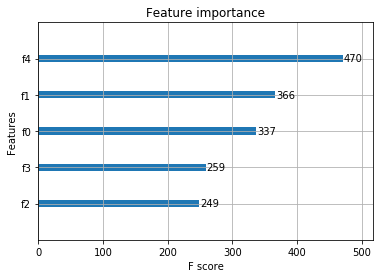

In [43]:
print('Train R^2 score : ', explained_variance_score(y1_train, y1_pred_tr), '\n',
     'Test R^2 score : ', explained_variance_score(y1_test, y1_pred_te))

print('MSE on train : ', mean_squared_error(y1_train, y1_pred_tr), '\n',
     'MSE on test : ', mean_squared_error(y1_test, y1_pred_te))

xgb.plot_importance(xgbReg)

In [7]:
from regressions import easyXGB

In [15]:
easyXGBReg = easyXGB()
easyXGBReg.set_params(tree_method = 'gpu_hist')
# easyXGBReg.fit(X_train, y1_train)

# Cross validation

In [6]:
from cross_validation import multi_cross_validation

In [8]:
from regressions import easyXGB

In [11]:
easyXGBReg = easyXGB()
# easyXGBReg.set_params(tree_method = 'auto')
easyXGBReg.set_params(tree_method = 'gpu_hist')
# easyXGBReg.fit(X_train, y1_train)

In [38]:
methods = [[easyXGBReg, [{'reg_alpha': i, 'eta': k, 'max_depth': j, 'subsample': 1.0} 
                         for i in np.linspace(0.1,.6,num=21) for j in range(9,11,1) 
                         for k in np.linspace(0.66,0.66,num=1)]]]

## y1

In [7]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.4, random_state = 33)
print(X_train.shape, X_test.shape)
y1_train, y1_test = y1_train.values, y1_test.values

(91173, 8) (60783, 8)


Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1, 'eta': 0.7, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1, 'eta': 0.7333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1, 'eta': 0.7666666666666666, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1, 'eta': 0.7999999999999999, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1, 'eta': 0.8333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1, 'eta': 0.8666666666666667, 'max_depth': 8, 'subsample': 1.0}..

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1473684210526316, 'eta': 1.0, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1473684210526316, 'eta': 0.7, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1473684210526316, 'eta': 0.7333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1473684210526316, 'eta': 0.7666666666666666, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.1473684210526316, 'eta': 0.7999999999999999, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.14736

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.19473684210526315, 'eta': 0.8333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.19473684210526315, 'eta': 0.8666666666666667, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.19473684210526315, 'eta': 0.9, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.19473684210526315, 'eta': 0.9333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.19473684210526315, 'eta': 0.9666666666666667, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.24210526315789474, 'eta': 1.0, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.24210526315789474, 'eta': 0.7, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.24210526315789474, 'eta': 0.7333333333333333, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.24210526315789474, 'eta': 0.7666666666666666, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.24210526315789474, 'eta': 0.7999999999999999, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha'

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.2894736842105263, 'eta': 0.8333333333333333, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.2894736842105263, 'eta': 0.8666666666666667, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.2894736842105263, 'eta': 0.9, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.2894736842105263, 'eta': 0.9333333333333333, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.2894736842105263, 'eta': 0.9666666666666667, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.33684210526315794, 'eta': 1.0, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.33684210526315794, 'eta': 0.7, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.33684210526315794, 'eta': 0.7333333333333333, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.33684210526315794, 'eta': 0.7666666666666666, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.33684210526315794, 'eta': 0.7999999999999999, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.38421052631578945, 'eta': 0.8333333333333333, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.38421052631578945, 'eta': 0.8666666666666667, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.38421052631578945, 'eta': 0.9, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.38421052631578945, 'eta': 0.9333333333333333, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.38421052631578945, 'eta': 0.9666666666666667, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with para

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.43157894736842106, 'eta': 1.0, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.4789473684210527, 'eta': 0.7, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.4789473684210527, 'eta': 0.7333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.4789473684210527, 'eta': 0.7666666666666666, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.4789473684210527, 'eta': 0.7999999999999999, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.478

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5263157894736842, 'eta': 0.8333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5263157894736842, 'eta': 0.8666666666666667, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5263157894736842, 'eta': 0.9, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5263157894736842, 'eta': 0.9333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5263157894736842, 'eta': 0.9666666666666667, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5736842105263158, 'eta': 1.0, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5736842105263158, 'eta': 0.7, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5736842105263158, 'eta': 0.7333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5736842105263158, 'eta': 0.7666666666666666, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.5736842105263158, 'eta': 0.7999999999999999, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.57368

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6210526315789474, 'eta': 0.8333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6210526315789474, 'eta': 0.8666666666666667, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6210526315789474, 'eta': 0.9, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6210526315789474, 'eta': 0.9333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6210526315789474, 'eta': 0.9666666666666667, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6684210526315789, 'eta': 1.0, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6684210526315789, 'eta': 0.7, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6684210526315789, 'eta': 0.7333333333333333, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6684210526315789, 'eta': 0.7666666666666666, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6684210526315789, 'eta': 0.7999999999999999, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.6

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7157894736842105, 'eta': 0.8333333333333333, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7157894736842105, 'eta': 0.8666666666666667, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7157894736842105, 'eta': 0.9, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7157894736842105, 'eta': 0.9333333333333333, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7157894736842105, 'eta': 0.9666666666666667, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7631578947368421, 'eta': 1.0, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7631578947368421, 'eta': 0.7, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7631578947368421, 'eta': 0.7333333333333333, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7631578947368421, 'eta': 0.7666666666666666, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.7631578947368421, 'eta': 0.7999999999999999, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.8105263157894737, 'eta': 0.8333333333333333, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.8105263157894737, 'eta': 0.8666666666666667, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.8105263157894737, 'eta': 0.9, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.8105263157894737, 'eta': 0.9333333333333333, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.8105263157894737, 'eta': 0.9666666666666667, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.8578947368421053, 'eta': 1.0, 'max_depth': 11, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9052631578947369, 'eta': 0.7, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9052631578947369, 'eta': 0.7333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9052631578947369, 'eta': 0.7666666666666666, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9052631578947369, 'eta': 0.7999999999999999, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9052

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9526315789473684, 'eta': 0.8333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9526315789473684, 'eta': 0.8666666666666667, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9526315789473684, 'eta': 0.9, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9526315789473684, 'eta': 0.9333333333333333, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9526315789473684, 'eta': 0.9666666666666667, 'max_depth': 8, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7666666666666666, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7999999999999999, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.8333333333333333, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.8666666666666667, 'max_depth': 9, 'subsample': 1.0}..

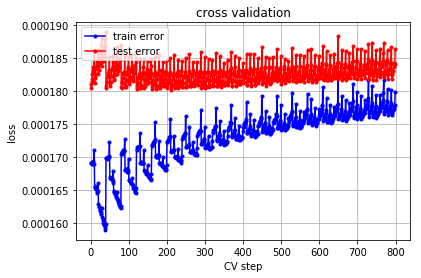

In [11]:
loss_tr, loss_te, method = multi_cross_validation(X_train, y1_train, 
                                                  methods=methods, k_fold=7, seed=np.random.randint(1000))

In [12]:
print(method, '\n MSE on train (CV): ', loss_tr, '\n MSE on test (CV) : ', loss_te)

[<models.easyXGB object at 0x7ff6a6ea8940>, {'reg_alpha': 0.33684210526315794, 'eta': 0.7, 'max_depth': 9, 'subsample': 1.0}] 
 MSE on train (CV):  0.00017079921840252747 
 MSE on test (CV) :  0.00018019262258437725


In [12]:
method = [0, {'reg_alpha': 0.33684210526315794, 'eta': 0.7, 'max_depth': 9, 'subsample': 1.0}]

In [13]:
easyXGBReg.fit(X_train, y1_train,  **method[1])

In [30]:
print('MSE on train : ', easyXGBReg.score(X_train, y1_train), '\n',
     'MSE on test : ', easyXGBReg.score(X_test, y1_test))

MSE on train :  0.00017128558240968658 
 MSE on test :  0.0001792565553186421


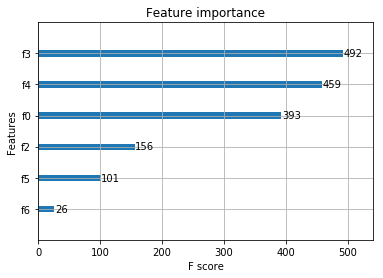

In [16]:
xgb.plot_importance(easyXGBReg.model)
plt.savefig('../results/k1_fwd_importance.pdf')

## y2

In [49]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.4, random_state=33)
print(X_train.shape, X_test.shape)
y2_train, y2_test = y2_train.values, y2_test.values

(91173, 5) (60783, 5)


Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.5, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.55, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.6, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.6499999999999999, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.7, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.5, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB o

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.55, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.6, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.6499999999999999, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.7, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.5, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.55, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.6499999999999999, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.7, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.5, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.55, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.6, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.6499999999999999, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <m

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.5, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.55, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.6, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.6499999999999999, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object 

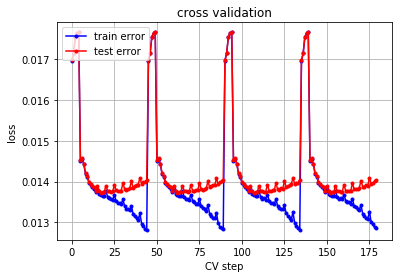

In [35]:
loss_tr, loss_te, method = multi_cross_validation(X_train, y2_train, 
                                                  methods=methods, k_fold=7, seed=np.random.randint(1000))

In [36]:
print(method, '\n MSE on train (CV): ', loss_tr, '\n MSE on test (CV) : ', loss_te)

[<models.easyXGB object at 0x7ff6a6ea8940>, {'reg_alpha': 0.9, 'eta': 0.6, 'max_depth': 4, 'subsample': 1.0}] 
 MSE on train (CV):  0.01366229676867241 
 MSE on test (CV) :  0.013723096054249826


In [50]:
method = [0,{'reg_alpha': 0.9, 'eta': 0.6, 'max_depth': 4, 'subsample': 1.0}]

In [51]:
easyXGBReg.fit(X_train, y2_train,  **method[1])

print('MSE on train : ', easyXGBReg.score(X_train, y2_train), '\n',
     'MSE on test : ', easyXGBReg.score(X_test, y2_test))



MSE on train :  0.013471205889118085 
 MSE on test :  0.013968297698241695


## y3

In [46]:
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.4, random_state=33)
print(X_train.shape, X_test.shape)
y3_train, y3_test = y3_train.values, y3_test.values

(91173, 5) (60783, 5)


Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.5, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.55, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.6, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.6499999999999999, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.7, 'max_depth': 1, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.85, 'eta': 0.5, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB o

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.55, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.6, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.6499999999999999, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.7, 'max_depth': 2, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.5, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.9, 'eta': 0.55, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.6499999999999999, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.7, 'max_depth': 3, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.5, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.55, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.6, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 0.95, 'eta': 0.6499999999999999, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <m

Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7, 'max_depth': 4, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.5, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.55, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.6, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.6499999999999999, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object at 0x7ff6a6ea8940> with param.s {'reg_alpha': 1.0, 'eta': 0.7, 'max_depth': 5, 'subsample': 1.0}... Be patient! ;)
Testing for method <models.easyXGB object 

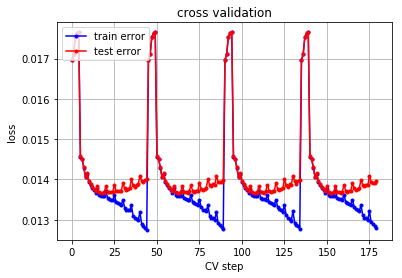

In [39]:
loss_tr, loss_te, method = multi_cross_validation(X_train, y3_train, 
                                                  methods=methods, k_fold=7, seed=np.random.randint(1000))

In [40]:
print(method, '\n MSE on train (CV): ', loss_tr, '\n MSE on test (CV) : ', loss_te)

[<models.easyXGB object at 0x7ff6a6ea8940>, {'reg_alpha': 0.95, 'eta': 0.6499999999999999, 'max_depth': 4, 'subsample': 1.0}] 
 MSE on train (CV):  0.013584698883356339 
 MSE on test (CV) :  0.013658328792530965


In [47]:
method = [0,{'reg_alpha': 0.95, 'eta': 0.65, 'max_depth': 4, 'subsample': 1.0}]

In [48]:
easyXGBReg.fit(X_train, y3_train, **method[1])

print('MSE on train : ', easyXGBReg.score(X_train, y3_train), '\n',
     'MSE on test : ', easyXGBReg.score(X_test, y3_test))



MSE on train :  0.013306938866246702 
 MSE on test :  0.013644848903191766


## y4

In [25]:
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.4, random_state = 33)
print(X_train.shape, X_test.shape)
y4_train, y4_test = y4_train.values, y4_test.values

(91173, 5) (60783, 5)


Testing for method <regressions.easyXGB object at 0x7f532fadcac8> with param.s {'reg_alpha': 0.1, 'eta': 0.66, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <regressions.easyXGB object at 0x7f532fadcac8> with param.s {'reg_alpha': 0.1, 'eta': 0.66, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <regressions.easyXGB object at 0x7f532fadcac8> with param.s {'reg_alpha': 0.125, 'eta': 0.66, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <regressions.easyXGB object at 0x7f532fadcac8> with param.s {'reg_alpha': 0.125, 'eta': 0.66, 'max_depth': 10, 'subsample': 1.0}... Be patient! ;)
Testing for method <regressions.easyXGB object at 0x7f532fadcac8> with param.s {'reg_alpha': 0.15000000000000002, 'eta': 0.66, 'max_depth': 9, 'subsample': 1.0}... Be patient! ;)
Testing for method <regressions.easyXGB object at 0x7f532fadcac8> with param.s {'reg_alpha': 0.15000000000000002, 'eta': 0.66, 'max_depth': 10, 'subsample': 1.0}..

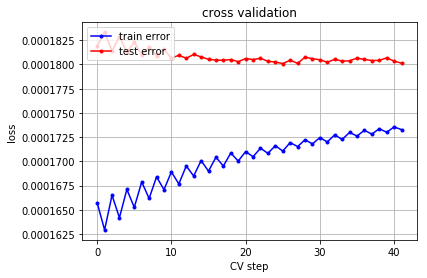

In [39]:
loss_tr, loss_te, method = multi_cross_validation(X_train, y4_train, 
                                                  methods=methods, k_fold=7, seed=7)

In [41]:
print(method, '\n MSE on train (CV): ', loss_tr, '\n MSE on test (CV) : ', loss_te)

[<regressions.easyXGB object at 0x7f532fadcac8>, {'reg_alpha': 0.4, 'eta': 0.66, 'max_depth': 10, 'subsample': 1.0}] 
 MSE on train (CV):  0.0001710669760378219 
 MSE on test (CV) :  0.0001800898717086127


In [42]:
method = [0,{'reg_alpha': 0.4, 'eta': 0.66, 'max_depth': 10, 'subsample': 1.0}]

In [43]:
easyXGBReg.fit(X_train, y4_train, **method[1])

print('MSE on train : ', easyXGBReg.score(X_train, y4_train), '\n',
     'MSE on test : ', easyXGBReg.score(X_test, y4_test))



MSE on train :  0.0001713204251958465 
 MSE on test :  0.00017948896365445238


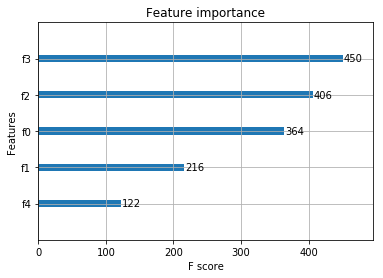

In [46]:
xgb.plot_importance(easyXGBReg.model)

## Reproduction

In [60]:
from regressions import reproduction_XGBoost

In [64]:
ReproductionXGB = reproduction_XGBoost(csv=True)

[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=7
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=9
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=9
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 0 pruned nodes, max_depth=9
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=9
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=9
[00:31:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 316 extra nodes, 0 pruned nodes, max_depth=9
[00:31:36]

In [65]:
ReproductionXGB.scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0.999844,0.999838,0.000174,0.000180
k1_fwd_effective,0.918964,0.916180,0.013478,0.013971
k2_bwd_effective,0.920206,0.918504,0.013307,0.013651
k2_fwd_effective,0.999844,0.999839,0.000174,0.000180


# Tests

In [4]:
df = pd.DataFrame({'2' : 3*[2],
                  '3' : 3*[3],
                  'cat' : [1,0,1]},
                 index = list(range(3)))
df = william.cast_categories(df, 'cat')

In [29]:
M = np.array([[2,3,5]for _ in range(4)])
print(M)

[[2 3 5]
 [2 3 5]
 [2 3 5]
 [2 3 5]]


In [30]:
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
M2 = poly.fit_transform(M)
print(M2)

[[ 2.  3.  5.  4.  6. 10.  9. 15. 25.]
 [ 2.  3.  5.  4.  6. 10.  9. 15. 25.]
 [ 2.  3.  5.  4.  6. 10.  9. 15. 25.]
 [ 2.  3.  5.  4.  6. 10.  9. 15. 25.]]


In [28]:
cond = True
[1 if x else 0 for x in df['a']==1]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
cast_categories(df, 'a', cat_name='Number')

,b,Number 1,Number 2,Number 3
0,4,1,0,0
1,5,1,0,0
2,6,1,0,0
3,7,1,0,0
4,4,0,1,0
5,5,0,1,0
6,6,0,1,0
7,7,0,1,0
8,4,0,0,1
9,5,0,0,1


In [16]:
    scores = pd.DataFrame({'R^2 train score': 4*[0],
                            'R^2 test score': 4*[0],
                            'MSE train score': 4*[0],
                            'MSE test score': 4*[0]}, index = ['k1_bwd_effective','k1_fwd_effective','k2_bwd_effective','k2_fwd_effective'])
    scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0,0,0,0
k1_fwd_effective,0,0,0,0
k2_bwd_effective,0,0,0,0
k2_fwd_effective,0,0,0,0


In [17]:
scores.loc['k1_bwd_effective'] = ridge_reg.score(X_train, y_train), ridge_reg.score(X_test, y_test), mean_squared_error(y_train, y_pred_tr),  mean_squared_error(y_test, y_pred_te)
scores

,R^2 train score,R^2 test score,MSE train score,MSE test score
k1_bwd_effective,0.988124,0.988077,0.01324,0.013262
k1_fwd_effective,0.000000,0.000000,0.00000,0.000000
k2_bwd_effective,0.000000,0.000000,0.00000,0.000000
k2_fwd_effective,0.000000,0.000000,0.00000,0.000000
